<a href="https://colab.research.google.com/github/victorncg/financas_quantitativas/blob/main/FETCH_REGISTRY_CVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "300">

# **Como obter e analisar dados de fundos de investimento**

*Victor Gomes*

# **0. Noções básicas**

### O que é um fundo de investimento?

**O que é um Fundo de Investimentos?**
Um fundo de investimentos funciona como uma espécie de condomínio.

Dentro de um fundo temos vários segmentos:

Existe a empresa administradora do fundo, o gestor, os profissionais que fazem a auditoria sobre os números do fundo e, por fim, mas não menos importante, os investidores, ou nesse caso, os cotistas.

Para simplificar a compreensão de um fundo, é sempre válido pensar nele exatamente como um condomínio:

As pessoas vivem juntas em um mesmo terreno, porque assim várias coisas acabam sendo divididas. Os custos para manutenção são compartilhados, a segurança, a área de lazer e diversas outras áreas.

O fundo de investimento parte da mesma prerrogativa: Porque investir sozinho, se o investidor pode fazer isso com mais pessoas, utilizando muito mais recursos e contratando um profissional ultra qualificado para cuidar de todo esse dinheiro?

É por isso que, em grande parte, os fundos funcionam como condomínios.

Fonte: https://maisretorno.com/portal/termos/f/fundo-de-investimentos

Ferramentas importantes para ajudar a analisar e comparar fundos de investimento

Portal de dados Anbima
https://data.anbima.com.br/

Mais Retorno
https://maisretorno.com/comparacao-fundos



### O que faremos na nossa aula?

Vamos começar a nossa extração explorando as páginas da CVM que tem as informações que serão extraídas.

É muito importante que você adquira familiaridade com a página de dados abertos da CVM: https://dados.cvm.gov.br/

É lá que estão contidas informações importantes no mercado financeiro, como demonstrativos e balanços de empresas de capital aberto, informações cadastrais e de desempenho de fundos de investimento, dentre outros.

Nossa aula aqui será dividida em dois momentos principais. Primeiramente, vamos buscar as informações diárias de desempenho dos fundos, e posteriormente buscaremos também os dados cadastrais destes fundos. A partir disto, faremos algumas análises.

Para dados de desempenho dos fundos:

https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/

Para dados cadastrais dos fundos:

http://dados.cvm.gov.br/dados/FI/CAD/DADOS/

# **1. Extração e processaemtno dos dados de desempenho**

## 1.1. Importação das bibliotecas

In [27]:
import requests
import pandas as pd

## 1.2. Captura dos dados

### 1.2.1. Como capturar um csv de dentro de um zip da CVM?

In [9]:
link = 'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202401.zip'

In [10]:
dados = pd.read_csv(link, sep = ';', compression = 'zip')

Inspecionando os dados

In [11]:
dados.head()

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,FI,00.017.024/0001-53,2024-01-02,1136699.13,34.298860,1139708.10,0.0,0.0,1
1,FI,00.017.024/0001-53,2024-01-03,1137245.82,34.312303,1140154.80,0.0,0.0,1
2,FI,00.017.024/0001-53,2024-01-04,1137741.93,34.326023,1140610.71,0.0,0.0,1
3,FI,00.017.024/0001-53,2024-01-05,1138240.64,34.338221,1141016.02,0.0,0.0,1
4,FI,00.017.024/0001-53,2024-01-08,1138427.98,34.350495,1141423.89,0.0,0.0,1


### 1.2.3. Expandindo a captura para vários meses

Note que é possível fazer com que a extração seja parametrizável

In [25]:
i = '202301'

In [26]:
f'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{i}.zip'

'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202301.zip'

Agora basta criar um loop que extrai todos os dataframes e os "empilha"

In [29]:
datas = ['202301','202302','202303',
         '202304','202305','202306',
         '202307','202308','202309',
         '202310','202311','202312',
         '202401','202402','202403']

In [30]:
dataframes = []

for data in datas:
    url = f'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_{i}.zip'
    dados = pd.read_csv(url, sep = ';', compression = 'zip')

    # Juntando os dataframes em uma lista
    dataframes.append(dados)

    print("Extração do mês ",data," finalizado")

combined_df = pd.concat(dataframes, ignore_index=True)

Extraction do mês  202301  finalizado
Extraction do mês  202302  finalizado
Extraction do mês  202303  finalizado
Extraction do mês  202304  finalizado
Extraction do mês  202305  finalizado
Extraction do mês  202306  finalizado
Extraction do mês  202307  finalizado
Extraction do mês  202308  finalizado
Extraction do mês  202309  finalizado
Extraction do mês  202310  finalizado
Extraction do mês  202311  finalizado
Extraction do mês  202312  finalizado
Extraction do mês  202401  finalizado
Extraction do mês  202402  finalizado
Extraction do mês  202403  finalizado


In [31]:
combined_df.shape

(8134170, 9)

In [32]:
combined_df.head()

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,FI,00.017.024/0001-53,2023-01-02,1101835.91,30.974427,1104834.84,0.0,0.0,1
1,FI,00.017.024/0001-53,2023-01-03,1102410.18,30.988913,1105351.56,0.0,0.0,1
2,FI,00.017.024/0001-53,2023-01-04,1102994.24,31.003303,1105864.82,0.0,0.0,1
3,FI,00.017.024/0001-53,2023-01-05,1103561.75,31.017294,1106363.87,0.0,0.0,1
4,FI,00.017.024/0001-53,2023-01-06,1103794.86,31.030820,1106846.36,0.0,0.0,1


In [33]:
combined_df.dtypes

TP_FUNDO          object
CNPJ_FUNDO        object
DT_COMPTC         object
VL_TOTAL         float64
VL_QUOTA         float64
VL_PATRIM_LIQ    float64
CAPTC_DIA        float64
RESG_DIA         float64
NR_COTST           int64
dtype: object

In [36]:
combined_df.index = pd.to_datetime(combined_df.DT_COMPTC)

# **2. Análises preliminares**

## 2.1. Filtro de CNPJ

In [37]:
combined_df[combined_df['CNPJ_FUNDO'] == '97.548.164/0001-90']

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
DT_COMPTC,,,,,,,,,
2023-01-02,FI,97.548.164/0001-90,2023-01-02,62214453.14,0.158259,62270133.54,0.0,0.0,1
2023-01-03,FI,97.548.164/0001-90,2023-01-03,62169019.13,0.160456,63134528.91,0.0,0.0,1
2023-01-04,FI,97.548.164/0001-90,2023-01-04,63161552.08,0.160364,63098257.02,0.0,0.0,1
2023-01-05,FI,97.548.164/0001-90,2023-01-05,62928677.87,0.157776,62079980.95,0.0,0.0,1
2023-01-06,FI,97.548.164/0001-90,2023-01-06,62164617.91,0.154507,60793961.22,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
2023-01-25,FI,97.548.164/0001-90,2023-01-25,59950590.57,0.150307,59141216.85,0.0,0.0,1
2023-01-26,FI,97.548.164/0001-90,2023-01-26,59238939.00,0.150356,59160428.15,0.0,0.0,1
2023-01-27,FI,97.548.164/0001-90,2023-01-27,59215954.22,0.151240,59508157.67,0.0,0.0,1


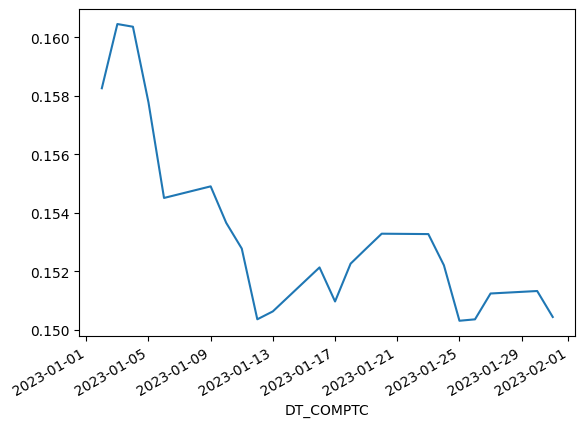

In [38]:
combined_df[combined_df['CNPJ_FUNDO'] == '97.548.164/0001-90'].VL_QUOTA.plot();

In [42]:
cadastral.dtypes

TP_FUNDO               object
CNPJ_FUNDO             object
DENOM_SOCIAL           object
DT_REG                 object
DT_CONST               object
CD_CVM                float64
DT_CANCEL              object
SIT                    object
DT_INI_SIT             object
DT_INI_ATIV            object
DT_INI_EXERC           object
DT_FIM_EXERC           object
CLASSE                 object
DT_INI_CLASSE          object
RENTAB_FUNDO           object
CONDOM                 object
FUNDO_COTAS            object
FUNDO_EXCLUSIVO        object
TRIB_LPRAZO            object
PUBLICO_ALVO           object
ENTID_INVEST           object
TAXA_PERFM            float64
INF_TAXA_PERFM         object
TAXA_ADM              float64
INF_TAXA_ADM           object
VL_PATRIM_LIQ         float64
DT_PATRIM_LIQ          object
DIRETOR                object
CNPJ_ADMIN             object
ADMIN                  object
PF_PJ_GESTOR           object
CPF_CNPJ_GESTOR        object
GESTOR                 object
CNPJ_AUDIT

# **3. Análises com dados cadastrais**

## 3.1. Extração dos dados de cadastro

Função para obtenção dos dados cadastrais dos fundos

In [39]:
url = "http://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv"

In [40]:
cadastral = pd.read_csv(url, sep = ';', encoding = 'ISO-8859-1')

<ipython-input-40-c85bfb431447>:1: DtypeWarning: Columns (14,17,18,20,22,24,27,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  cadastral = pd.read_csv(url, sep = ';', encoding = 'ISO-8859-1')


In [41]:
cadastral.head()

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
0,FACFIF,00.000.684/0001-21,DEUTSCHE BANK FDO APLIC QUOTAS FDO INV FINANCE...,2003-04-30,1994-12-20,19.0,2000-08-01,CANCELADA,2000-08-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FACFIF,00.000.731/0001-37,ITAMARITI CASH FUNDO APLICACAO QUOTAS FDOS INV...,2003-04-30,1994-05-18,40681.0,1996-01-26,CANCELADA,1996-01-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FACFIF,00.000.732/0001-81,FUNDO APLIC. QUOTAS DE F.I. SANTANDER CURTO PRAZO,2003-04-30,1994-05-24,27.0,1999-09-03,CANCELADA,1999-09-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FACFIF,00.000.740/0001-28,FUNDO DE APLIC EM QUOTAS DE FUNDOS DE INV BMC ...,2003-04-30,1994-05-23,40690.0,1996-06-10,CANCELADA,1996-06-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FACFIF,00.000.749/0001-39,BALANCE FUNDO APLICACAO QUOTAS FUNDO INVESTIME...,2003-04-30,1994-05-12,35.0,2000-06-26,CANCELADA,2000-06-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
cadastral.isnull().sum() * 100 / len(cadastral)

TP_FUNDO               0.000000
CNPJ_FUNDO             0.000000
DENOM_SOCIAL           0.000000
DT_REG                 0.001298
DT_CONST               2.721186
CD_CVM                 0.006488
DT_CANCEL             46.229010
SIT                    0.000000
DT_INI_SIT             0.000000
DT_INI_ATIV           27.483066
DT_INI_EXERC          22.489684
DT_FIM_EXERC          22.489684
CLASSE                17.251045
DT_INI_CLASSE         17.251045
RENTAB_FUNDO          37.433495
CONDOM                17.702629
FUNDO_COTAS           17.243259
FUNDO_EXCLUSIVO       29.811061
TRIB_LPRAZO           63.102437
PUBLICO_ALVO          43.535076
ENTID_INVEST          96.892113
TAXA_PERFM            55.417716
INF_TAXA_PERFM        92.120630
TAXA_ADM              55.145208
INF_TAXA_ADM          89.440970
VL_PATRIM_LIQ         13.563105
DT_PATRIM_LIQ         13.563105
DIRETOR               47.412473
CNPJ_ADMIN            34.541019
ADMIN                 34.541019
PF_PJ_GESTOR          35.231372
CPF_CNPJ

Fazendo um merge

In [44]:
fundos_df = pd.merge(combined_df, cadastral, how = 'left', on = 'CNPJ_FUNDO')

In [45]:
fundos_df.head()

,TP_FUNDO_x,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ_x,CAPTC_DIA,RESG_DIA,NR_COTST,TP_FUNDO_y,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
0,FI,00.017.024/0001-53,2023-01-02,1101835.91,30.974427,1104834.84,0.0,0.0,1,FI,...,62.375.134/0001-44,BRAM - BRADESCO ASSET MANAGEMENT S.A. DISTRIBU...,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,60.746.948/0001-12,BANCO BRADESCO S.A.,60.746.948/0001-12,BANCO BRADESCO S.A.,N,Renda Fixa Duração Livre Grau de Invest.
1,FI,00.017.024/0001-53,2023-01-02,1101835.91,30.974427,1104834.84,0.0,0.0,1,FIF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FI,00.017.024/0001-53,2023-01-03,1102410.18,30.988913,1105351.56,0.0,0.0,1,FI,...,62.375.134/0001-44,BRAM - BRADESCO ASSET MANAGEMENT S.A. DISTRIBU...,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,60.746.948/0001-12,BANCO BRADESCO S.A.,60.746.948/0001-12,BANCO BRADESCO S.A.,N,Renda Fixa Duração Livre Grau de Invest.
3,FI,00.017.024/0001-53,2023-01-03,1102410.18,30.988913,1105351.56,0.0,0.0,1,FIF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FI,00.017.024/0001-53,2023-01-04,1102994.24,31.003303,1105864.82,0.0,0.0,1,FI,...,62.375.134/0001-44,BRAM - BRADESCO ASSET MANAGEMENT S.A. DISTRIBU...,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,60.746.948/0001-12,BANCO BRADESCO S.A.,60.746.948/0001-12,BANCO BRADESCO S.A.,N,Renda Fixa Duração Livre Grau de Invest.


In [46]:
fundos_df.shape

(9191970, 49)

In [48]:
percent_missing  = fundos_df.isnull().sum() * 100 / len(fundos_df)

In [49]:
percent_missing

TP_FUNDO_x             0.000000
CNPJ_FUNDO             0.000000
DT_COMPTC              0.000000
VL_TOTAL               0.000000
VL_QUOTA               0.000000
VL_PATRIM_LIQ_x        0.000000
CAPTC_DIA              0.000000
RESG_DIA               0.000000
NR_COTST               0.000000
TP_FUNDO_y             0.862601
DENOM_SOCIAL           0.862601
DT_REG                 0.866191
DT_CONST               1.533948
CD_CVM                 0.876961
DT_CANCEL             85.147145
SIT                    0.862601
DT_INI_SIT             0.862601
DT_INI_ATIV            7.540658
DT_INI_EXERC           5.374691
DT_FIM_EXERC           5.374691
CLASSE                 7.065460
DT_INI_CLASSE          7.065460
RENTAB_FUNDO          17.812721
CONDOM                 7.130082
FUNDO_COTAS            7.065460
FUNDO_EXCLUSIVO        7.950254
TRIB_LPRAZO           58.563833
PUBLICO_ALVO           7.649666
ENTID_INVEST          99.782147
TAXA_PERFM            22.602554
INF_TAXA_PERFM        85.575181
TAXA_ADM

In [58]:
colunas_remover = percent_missing[percent_missing > 30]

In [61]:
colunas_remover.index

Index(['DT_CANCEL', 'TRIB_LPRAZO', 'ENTID_INVEST', 'INF_TAXA_PERFM',
       'INF_TAXA_ADM'],
      dtype='object')

Removendo colunas com mais de 30% de missings

In [ ]:
fundos_df = fundos_df.drop(columns = colunas_remover.index, axis = 1).reset_index(drop = True)

In [1]:
fundos_df.shape

NameError: name 'fundos_df' is not defined

In [7]:
def get_funds_info(cnpj:object = None):

    """
    Fetches the registration data of investment funds from the Brazilian Securities and Exchange Commission (CVM).

    Parameters:
    - cnpj (str, optional): CNPJ (National Registry of Legal Entities) of the specific fund to retrieve information for.
      If not provided, information for all funds is returned.

    Returns:
    - DataFrame: DataFrame containing the registration data of investment funds. Columns may include:
      - CNPJ: National Registry of Legal Entities.
      - DENOM_SOCIAL: Legal name of the company.
      - SIT: Status of the fund registration with the CVM.
      - GESTOR: Name of the fund manager.
      - ... (other relevant information)
    """

    url = "http://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv"
    info = pd.read_csv(url, sep = ';', encoding = 'ISO-8859-1', low_memory=False)

    if cnpj != None:
        info = info[info['CNPJ_FUNDO'] == cnpj]

    return info.reset_index(drop = True)

In [8]:
get_funds_info('07.593.972/0001-86')

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
0,FI,07.593.972/0001-86,BRASILPREV TOP TPF FUNDO DE INVESTIMENTO RENDA...,2005-09-19,2005-09-13,62324.0,NaN,EM FUNCIONAMENTO NORMAL,2005-09-21,2005-09-21,...,30.822.936/0001-69,BB GESTAO DE RECURSOS DTVM S.A,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,00.000.000/0001-91,BANCO DO BRASIL S.A.,00.000.000/0001-91,BANCO DO BRASIL S.A.,N,Previdência RF Duração Baixa Soberano


In [ ]:
cadastral.head()

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
0,FACFIF,00.000.684/0001-21,DEUTSCHE BANK FDO APLIC QUOTAS FDO INV FINANCE...,2003-04-30,1994-12-20,19.0,2000-08-01,CANCELADA,2000-08-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FACFIF,00.000.731/0001-37,ITAMARITI CASH FUNDO APLICACAO QUOTAS FDOS INV...,2003-04-30,1994-05-18,40681.0,1996-01-26,CANCELADA,1996-01-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FACFIF,00.000.732/0001-81,FUNDO APLIC. QUOTAS DE F.I. SANTANDER CURTO PRAZO,2003-04-30,1994-05-24,27.0,1999-09-03,CANCELADA,1999-09-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FACFIF,00.000.740/0001-28,FUNDO DE APLIC EM QUOTAS DE FUNDOS DE INV BMC ...,2003-04-30,1994-05-23,40690.0,1996-06-10,CANCELADA,1996-06-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FACFIF,00.000.749/0001-39,BALANCE FUNDO APLICACAO QUOTAS FUNDO INVESTIME...,2003-04-30,1994-05-12,35.0,2000-06-26,CANCELADA,2000-06-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cadastral.shape

(73963, 41)

In [ ]:
cadastral[cadastral['CNPJ_FUNDO'] == '32.222.977/0001-40']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
38370,FI,32.222.977/0001-40,FRAM CAPITAL FIMP FUNDO DE INVESTIMENTO MULTIM...,2018-12-17,2018-11-29,314382.0,NaN,EM FUNCIONAMENTO NORMAL,2019-01-09,2019-01-09,...,00.806.535/0001-54,PLANNER CORRETORA DE VALORES S.A.,42.170.852/0001-77,UHY BENDORAYTES & CIA AUDITORES INDEPENDENTES,00.806.535/0001-54,PLANNER CORRETORA DE VALORES S.A.,00.806.535/0001-54,PLANNER CORRETORA DE VALORES S.A.,N,Multimercados Estrat. Específica


## 3.4. Retornando um fundo de acordo com o nome

In [ ]:
cadastral[cadastral['DENOM_SOCIAL'].str.contains('ALASKA BLACK') ]

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
20636,FI,12.055.107/0001-16,ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM A...,2010-07-31,2010-06-02,145238.0,NaN,EM FUNCIONAMENTO NORMAL,2010-09-17,2010-09-17,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Ações Livre
21688,FI,12.987.743/0001-86,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,2011-01-12,2011-01-12,154849.0,NaN,EM FUNCIONAMENTO NORMAL,2011-01-24,2011-01-24,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Ações Livre
26419,FI,17.634.289/0001-01,ALFA ALASKA BLACK - FIC FI EM AÇÕES - BDR NÍV...,2017-08-02,2013-01-28,283100.0,2017-12-13,CANCELADA,2017-12-13,2017-08-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
33474,FI,26.648.868/0001-96,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,2016-12-29,2016-12-28,270652.0,NaN,EM FUNCIONAMENTO NORMAL,2017-01-03,2017-01-03,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Ações Livre
35127,FI,28.504.479/0001-12,ALFA ALASKA BLACK INSTITUCIONAL - FUNDO DE INV...,2017-11-20,2017-03-21,289450.0,2022-03-04,CANCELADA,2022-03-04,2017-12-08,...,60.770.336/0001-65,BANCO ALFA DE INVESTIMENTO S.A.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,60.746.948/0001-12,BANCO BRADESCO S.A.,60.746.948/0001-12,BANCO BRADESCO S.A.,N,NaN
38971,FI,32.757.743/0001-05,ALASKA BLACK ADVISORY XP SEGUROS PREVIDÊNCIA F...,2019-08-29,2019-08-27,334723.0,NaN,EM FUNCIONAMENTO NORMAL,2019-11-01,2019-11-01,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre
38972,FI,32.757.743/0001-05,ALASKA BLACK ADVISORY XP SEGUROS PREVIDÊNCIA F...,2019-08-29,2019-08-27,334723.0,NaN,EM FUNCIONAMENTO NORMAL,2019-11-01,2019-11-01,...,29.408.732/0001-05,XP VIDA E PREVIDÊNCIA S.A.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre
38981,FI,32.760.103/0001-46,ALASKA BLACK ADVISORY XP SEGUROS FIFE PREVIDÊN...,2019-08-29,2019-08-27,334731.0,NaN,EM FUNCIONAMENTO NORMAL,2019-10-31,2019-10-31,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre
38982,FI,32.760.103/0001-46,ALASKA BLACK ADVISORY XP SEGUROS FIFE PREVIDÊN...,2019-08-29,2019-08-27,334731.0,NaN,EM FUNCIONAMENTO NORMAL,2019-10-31,2019-10-31,...,29.408.732/0001-05,XP VIDA E PREVIDÊNCIA S.A.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre
38988,FI,32.761.323/0001-94,ALASKA BLACK ADVISORY XP SEGUROS PREVIDENCIÁRI...,2019-08-29,2019-08-27,334758.0,NaN,EM FUNCIONAMENTO NORMAL,2019-10-31,2019-10-31,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Previdência Multimercado Livre


In [ ]:
alaskas = cadastral[cadastral['DENOM_SOCIAL'].str.contains('ALASKA BLACK') & cadastral['GESTOR'].str.contains('ALASKA INVESTIMENTOS LTDA.')]

In [ ]:
alaskas.CNPJ_FUNDO

20636    12.055.107/0001-16
21688    12.987.743/0001-86
33474    26.648.868/0001-96
38971    32.757.743/0001-05
38981    32.760.103/0001-46
38988    32.761.323/0001-94
42204    35.939.700/0001-20
42210    35.939.857/0001-56
Name: CNPJ_FUNDO, dtype: object

In [ ]:
alaskas.index

Int64Index([20636, 21688, 33474, 38971, 38981, 38988, 42204, 42210], dtype='int64')

Analisando os fundos

In [ ]:
fundo_df = pd.DataFrame(columns = ['Fundo', 'Classe', 'PL'])

In [ ]:
fundo_df

,Fundo,Classe,PL


In [ ]:
for cnpj in alaskas.CNPJ_FUNDO:
  fundo = cadastral[cadastral['CNPJ_FUNDO'] == cnpj]
  fundo_df.loc[cnpj] = [fundo['DENOM_SOCIAL'].values[0],fundo['CLASSE'].values[0],fundo['VL_PATRIM_LIQ'].values[0]]

In [ ]:
fundo_df

,Fundo,Classe,PL
12.055.107/0001-16,ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM A...,Fundo de Ações,1.478361e+09
12.987.743/0001-86,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,Fundo de Ações,1.202346e+09
26.648.868/0001-96,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,Fundo de Ações,2.770866e+08
32.757.743/0001-05,ALASKA BLACK ADVISORY XP SEGUROS PREVIDÊNCIA F...,Fundo Multimercado,6.158665e+07
32.760.103/0001-46,ALASKA BLACK ADVISORY XP SEGUROS FIFE PREVIDÊN...,Fundo Multimercado,1.320081e+08
32.761.323/0001-94,ALASKA BLACK ADVISORY XP SEGUROS PREVIDENCIÁRI...,Fundo Multimercado,1.610853e+07
35.939.700/0001-20,ALASKA BLACK 70 ADVISORY XP SEGUROS PREVIDENCI...,Fundo Multimercado,2.966633e+07
35.939.857/0001-56,ALASKA BLACK 100 ADV XP SEGUROS PREVIDENCIÁRIO...,Fundo Multimercado,3.930835e+07


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

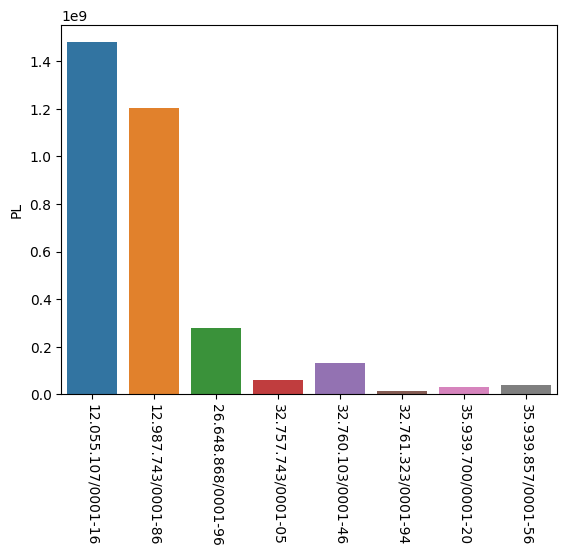

In [ ]:
sns.barplot(data=fundo_df, x=fundo_df.index, y=fundo_df.PL)
plt.xticks(rotation=270);

## 3.5. Fundos que mais subiram e que mais caíram

### 3.5.1. Manipulações iniciais nos dados

Filtrando fundos pelo número de cotistas

In [ ]:
filtro = informes_diarios[informes_diarios['NR_COTST']> 1000]

In [ ]:
filtro.head()

,index,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
23,24,FI,00.068.305/0001-35,2023-08-01,38146599.43,33.765570,38140273.11,0.0,6507.17,6111
24,25,FI,00.068.305/0001-35,2023-08-02,38171349.17,33.785428,38162704.68,0.0,0.00,6111
25,26,FI,00.068.305/0001-35,2023-08-03,38191579.87,33.802958,38180609.63,0.0,1895.89,6109
26,27,FI,00.068.305/0001-35,2023-08-04,38212193.58,33.819188,38198902.64,0.0,38.53,6108
27,28,FI,00.068.305/0001-35,2023-08-07,38160740.35,33.834391,38144962.55,0.0,71111.87,6106


In [ ]:
fundos = filtro.pivot(index = 'DT_COMPTC', columns = 'CNPJ_FUNDO', values = ['VL_TOTAL', 'VL_QUOTA', 'VL_PATRIM_LIQ'])

Para calcular o retorno dos fundos, vamos normalizar o valor das cotas

In [ ]:
normalizados = fundos['VL_QUOTA']/fundos['VL_QUOTA'].iloc[0]

In [ ]:
normalizados

CNPJ_FUNDO,00.068.305/0001-35,00.071.477/0001-68,00.222.725/0001-24,00.222.816/0001-60,00.280.302/0001-60,00.306.278/0001-91,00.322.699/0001-06,00.360.293/0001-18,00.398.561/0001-90,00.400.490/0001-13,...,60.906.179/0001-72,67.976.449/0001-60,68.599.141/0001-06,68.623.479/0001-56,68.670.512/0001-07,73.899.759/0001-21,88.002.696/0001-36,88.198.056/0001-43,97.519.703/0001-62,97.519.794/0001-36
DT_COMPTC,,,,,,,,,,,,,,,,,,,,,
2023-08-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-08-02,1.000588,1.000442,1.000485,1.000708,1.000627,1.000521,1.000580,1.001418,0.993952,1.002123,...,1.000523,0.996732,1.000449,1.000588,0.975868,0.996731,0.997128,1.010028,1.000672,1.000525
2023-08-03,1.001107,1.000896,1.001211,1.001482,1.001114,1.001065,1.001182,1.015993,0.992204,1.006490,...,1.001071,0.994409,1.000898,1.001108,0.964554,0.994434,0.995741,1.018282,1.001085,1.001047
2023-08-04,1.001588,1.001333,1.001770,1.002012,1.001700,1.001604,1.001758,1.013676,0.989023,1.004821,...,1.001610,0.985440,1.001338,1.001589,0.952632,0.985496,0.988363,1.022622,1.001458,1.001607
2023-08-07,1.002038,1.001766,1.002205,1.002140,1.002093,1.002148,1.002335,1.019972,0.987418,1.003267,...,1.002156,0.984349,1.001782,1.002039,0.950474,0.984448,0.986437,1.010669,1.001719,1.002125
2023-08-08,1.002542,1.002203,1.002753,1.003163,1.002944,1.002692,1.002918,1.021264,0.985150,1.003246,...,1.002702,0.981894,1.002219,1.002543,0.942134,0.982016,0.984695,1.007894,1.002286,1.002655
2023-08-09,1.003085,1.002631,1.003186,1.003679,1.003339,1.003242,1.003499,1.022585,0.976726,1.000839,...,1.003255,0.976211,1.002651,1.003086,0.932713,0.976372,0.977745,1.002058,1.002849,1.003185
2023-08-10,1.003578,1.003052,1.003684,1.004517,1.003853,1.003741,1.004038,1.015372,0.977064,1.001764,...,1.003757,0.975639,1.003076,1.003580,0.927988,0.975821,0.975910,1.000602,1.003620,1.003692
2023-08-11,1.004148,1.003473,1.004428,1.005350,1.004396,1.004262,1.004617,1.021376,0.970738,1.004139,...,1.004278,0.973231,1.003497,1.004150,0.925255,0.973432,0.971156,1.000300,1.004712,1.004195


In [ ]:
cotas_normalizadas = pd.DataFrame(normalizados.iloc[-1])

In [ ]:
cotas_normalizadas.sort_values('2023-08-31', ascending = False)[:5]

,2023-08-31
CNPJ_FUNDO,
40.503.169/0001-89,1.101075
34.218.740/0001-10,1.091169
08.336.054/0001-34,1.076299
11.060.594/0001-42,1.076066
24.454.718/0001-16,1.054011


### **Maiores altas**

In [ ]:
altas = (cotas_normalizadas.sort_values('2023-08-31', ascending = False)[:5]['2023-08-31'] - 1)*100

In [ ]:
fundo_df = pd.DataFrame(columns = ['retornos', 'Fundo', 'Classe', 'PL'])

In [ ]:
fundo_df

,retornos,Fundo,Classe,PL


In [ ]:
altas.index

Index(['40.503.169/0001-89', '34.218.740/0001-10', '08.336.054/0001-34',
       '11.060.594/0001-42', '24.454.718/0001-16'],
      dtype='object', name='CNPJ_FUNDO')

In [ ]:
cadastral[cadastral['CNPJ_FUNDO'] == '40.503.169/0001-89']['SIT']

46338    EM FUNCIONAMENTO NORMAL
Name: SIT, dtype: object

In [ ]:
for cnpj in altas.index:
  fundo = cadastral[cadastral['CNPJ_FUNDO'] == cnpj]
  fundo_df.loc[cnpj] = [altas[altas.index == cnpj].values[0], fundo['DENOM_SOCIAL'].values[0],fundo['CLASSE'].values[0],fundo['VL_PATRIM_LIQ'].values[0]]

In [ ]:
fundo_df

,retornos,Fundo,Classe,PL
40.503.169/0001-89,10.107455,VITREO URANIO FUNDO DE INVESTIMENTO MULTIMERCADO,Fundo Multimercado,4.510387e+07
34.218.740/0001-10,9.116947,TREND CANNABIS FUNDO DE INVESTIMENTO MULTIMERCADO,Fundo Multimercado,2.652952e+07
08.336.054/0001-34,7.629897,SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETRO...,Fundo de Ações,1.280132e+08
11.060.594/0001-42,7.606607,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA PETROBRAS...,Fundo de Ações,9.232368e+07
24.454.718/0001-16,5.401112,JPMORGAN DOLAR GLOBAL MACRO OPPORTUNITIES FI M...,Fundo Multimercado,1.447031e+08


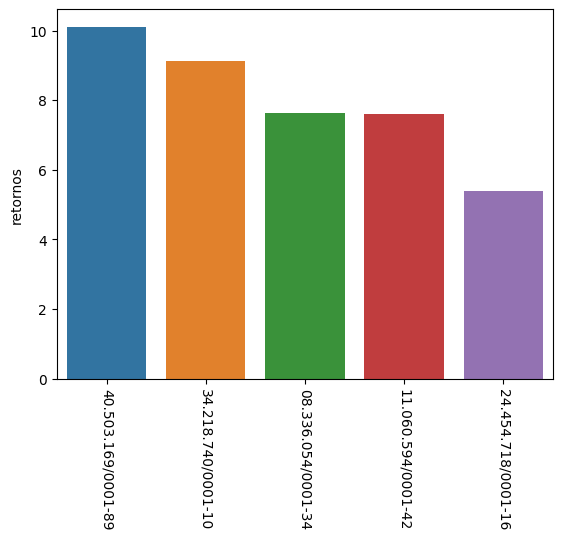

In [ ]:
sns.barplot(data=fundo_df, x=fundo_df.index, y=fundo_df.retornos)
plt.xticks(rotation=270);

### **Maiores quedas**

In [ ]:
baixas = (cotas_normalizadas.sort_values('2023-08-31', ascending = True)[:5]['2023-08-31'] - 1)*100

In [ ]:
baixas

CNPJ_FUNDO
10.590.125/0001-72   -19.391173
10.869.628/0001-81   -19.217062
11.182.072/0001-13   -19.211365
18.832.847/0001-06   -16.303957
41.033.759/0001-58   -12.491931
Name: 2023-08-31, dtype: float64

In [ ]:
fundo_df = pd.DataFrame(columns = ['retornos', 'Fundo', 'Classe', 'PL'])

In [ ]:
fundo_df

,retornos,Fundo,Classe,PL


In [ ]:
baixas.index

Index(['10.590.125/0001-72', '10.869.628/0001-81', '11.182.072/0001-13',
       '18.832.847/0001-06', '41.033.759/0001-58'],
      dtype='object', name='CNPJ_FUNDO')

In [ ]:
for cnpj in baixas.index:
  fundo = cadastral[cadastral['CNPJ_FUNDO'] == cnpj]
  fundo_df.loc[cnpj] = [baixas[baixas.index == cnpj].values[0], fundo['DENOM_SOCIAL'].values[0],fundo['CLASSE'].values[0],fundo['VL_PATRIM_LIQ'].values[0]]

In [ ]:
fundo_df

,retornos,Fundo,Classe,PL
10.590.125/0001-72,-19.391173,BRADESCO FUNDO DE INVESTIMENTO EM AÇÕES CIELO,Fundo de Ações,1.107534e+07
10.869.628/0001-81,-19.217062,BB AÇÕES CIELO FUNDO DE INVESTIMENTO,Fundo de Ações,3.651215e+07
11.182.072/0001-13,-19.211365,LOGOS TOTAL RETURN FI EM COTAS DE FUNDOS DE IN...,Fundo Multimercado,1.416424e+08
18.832.847/0001-06,-16.303957,VERSA LONG BIASED FUNDO DE INVESTIMENTO MULTIM...,Fundo Multimercado,9.201895e+07
41.033.759/0001-58,-12.491931,EMPIRICUS CRIPTO HIGH BETA FIC FI MULTIMERCADO...,Fundo Multimercado,2.041743e+07


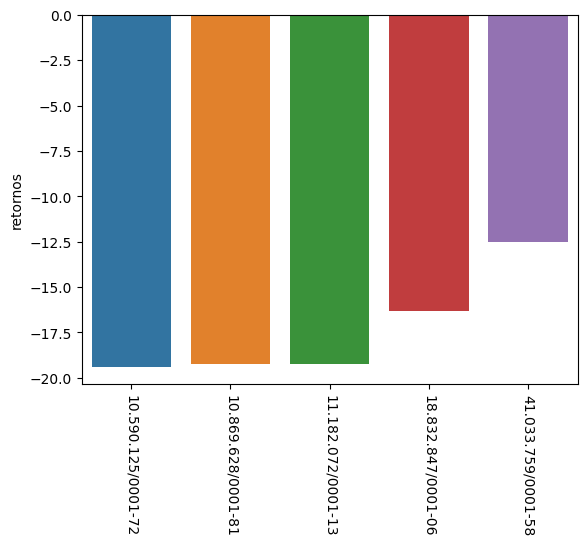

In [ ]:
sns.barplot(data=fundo_df, x=fundo_df.index, y=fundo_df.retornos)
plt.xticks(rotation=270);